# Data Preprocessing
**by. 18012635 양원석(Wonseok Yang)**

---


## 1. Dataset: Wine

In [ ]:
from sklearn.datasets import load_wine

# Using the scikit-learn function to load the dataset
data = load_wine(as_frame=True)
df = data['data']
df['class'] = data['target']

# Show the dataset
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


## 2. Dealing with missing data

In [ ]:
import numpy as np
import pandas as pd

# Randomly set 5% of each column entry to NaN
for i, col in enumerate(df.columns):

  # Except for target column
  if col == 'class':
    continue
  df.loc[df.sample(frac=0.05, random_state=i).index, col] = np.nan
  print(df.sample(frac=0.05, random_state=i).index)

# Show the number of NaN entry in each column
print(df.isnull().sum())

Int64Index([54, 151, 63, 55, 123, 121, 7, 160, 106], dtype='int64')
Int64Index([161, 117, 19, 69, 53, 138, 112, 14, 160], dtype='int64')
Int64Index([12, 23, 166, 25, 35, 13, 65, 171, 112], dtype='int64')
Int64Index([40, 53, 34, 109, 159, 23, 46, 72, 78], dtype='int64')
Int64Index([163, 142, 14, 45, 81, 157, 26, 74, 1], dtype='int64')
Int64Index([28, 66, 3, 17, 138, 166, 48, 40, 95], dtype='int64')
Int64Index([30, 97, 92, 128, 19, 11, 93, 94, 90], dtype='int64')
Int64Index([147, 36, 167, 171, 126, 133, 102, 32, 120], dtype='int64')
Int64Index([57, 163, 76, 1, 103, 126, 169, 26, 130], dtype='int64')
Int64Index([53, 44, 17, 175, 39, 47, 158, 173, 160], dtype='int64')
Int64Index([69, 103, 20, 116, 56, 97, 117, 39, 172], dtype='int64')
Int64Index([135, 0, 97, 53, 16, 41, 93, 102, 98], dtype='int64')
Int64Index([160, 156, 78, 45, 112, 168, 7, 153, 103], dtype='int64')
alcohol                          9
malic_acid                      17
ash                             18
alcalinity_of_ash   

In [ ]:
df.loc[54]

alcohol                         NaN
malic_acid                      NaN
ash                             NaN
alcalinity_of_ash               NaN
magnesium                       NaN
total_phenols                   NaN
flavanoids                      NaN
nonflavanoid_phenols            NaN
proanthocyanins                 NaN
color_intensity                 NaN
hue                             NaN
od280/od315_of_diluted_wines    NaN
proline                         NaN
class                           0.0
Name: 54, dtype: float64

## 3. Dealing with missing data
### Method 1: Eliminate rows with missing value
-> bad approach

In [ ]:
# Method 1: Eliminate rows with missing value
df_dropna = df.dropna(axis=0)

print("Shape before dropping:", df.shape)
print("Shape after dropping:", df_dropna.shape)

Shape before dropping: (178, 14)
Shape after dropping: (93, 14)


### Method 2: Impute missing values

In [ ]:
# Method 2: Impute/fill the missing value with column mean
df = df.fillna(df.mean())

# Display only the first 2 decimal point
pd.set_option("display.precision", 2)

# Show the dataframe
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


## 4. Dataset separation
### 1) split dataset

In [ ]:
from sklearn.model_selection import train_test_split

# X will be all columns other than "class"
# y will be the "class" column
X = df.drop("class", axis=1).values
y = df['class'].values

# Split the data into 70:30, training:test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

Training data shape: (124, 13)
Test data shape: (54, 13)


### 2) check the split result
-> imbalanced

In [ ]:
y_class_dist = np.unique(y, return_counts=True)[1] / y.shape[0] * 100
y_train_class_dist = np.unique(y_train, return_counts=True)[1] / y_train.shape[0] * 100
y_test_class_dist = np.unique(y_test, return_counts=True)[1] / y_test.shape[0] * 100

print("Class distribution before split: {:.2f}% {:.2f}% {:.2f}%".format(y_class_dist[0], y_class_dist[1], y_class_dist[2]))
print("Class distribution in training set: {:.2f}% {:.2f}% {:.2f}%".format(y_train_class_dist[0], y_train_class_dist[1], y_train_class_dist[2]))
print("Class distribution in test set: {:.2f}% {:.2f}% {:.2f}%".format(y_test_class_dist[0], y_test_class_dist[1], y_test_class_dist[2]))

Class distribution before split: 33.15% 39.89% 26.97%
Class distribution in training set: 32.26% 39.52% 28.23%
Class distribution in test set: 35.19% 40.74% 24.07%


### 3) apply the 'stratify' option

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

Training data shape: (124, 13)
Test data shape: (54, 13)


### 4) re-check the split result
-> balanced!

In [ ]:
y_class_dist = np.unique(y, return_counts=True)[1] / y.shape[0] * 100
y_train_class_dist = np.unique(y_train, return_counts=True)[1] / y_train.shape[0] * 100
y_test_class_dist = np.unique(y_test, return_counts=True)[1] / y_test.shape[0] * 100

print("Class distribution before split: {:.2f}% {:.2f}% {:.2f}%".format(y_class_dist[0], y_class_dist[1], y_class_dist[2]))
print("Class distribution in training set: {:.2f}% {:.2f}% {:.2f}%".format(y_train_class_dist[0], y_train_class_dist[1], y_train_class_dist[2]))
print("Class distribution in test set: {:.2f}% {:.2f}% {:.2f}%".format(y_test_class_dist[0], y_test_class_dist[1], y_test_class_dist[2]))

Class distribution before split: 33.15% 39.89% 26.97%
Class distribution in training set: 33.06% 40.32% 26.61%
Class distribution in test set: 33.33% 38.89% 27.78%


## 5. Feature scaling
### 1) MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initiate MinMaxScaler
mms = MinMaxScaler()

# Fit and transform the training data
X_train_norm = mms.fit_transform(X_train)

# Transform the test data
X_test_norm = mms.transform(X_test)

# Inverse the training data
X_train_inversed = mms.inverse_transform(X_train_norm)

# Print only the first 2 decimal point and disable scientific number format
np.set_printoptions(precision=2, suppress=True)

print("Sample data before scaled: {}".format(X_train[0]))
print("Sample data after scaled: {}".format(X_train_norm[0]))
print("Sample scaled data after inversed: {}".format(X_train_inversed[0]))

Sample data before scaled: [ 13.62   4.95   2.35  20.    92.     2.     0.8    0.47   1.02   4.4
   0.91   2.05 550.  ]
Sample data after scaled: [0.65 0.86 0.43 0.46 0.27 0.35 0.13 0.68 0.19 0.24 0.41 0.29 0.19]
Sample scaled data after inversed: [ 13.62   4.95   2.35  20.    92.     2.     0.8    0.47   1.02   4.4
   0.91   2.05 550.  ]


### 2) StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initiate StandardScaler
stdsc = StandardScaler()

# Fit and transform the training data
X_train_std = stdsc.fit_transform(X_train)

# Transform the test data
X_test_std = stdsc.transform(X_test)

# Inverse the training data
X_train_inversed = stdsc.inverse_transform(X_train_std)

print("Sample data before scaled: {}".format(X_train[0]))
print("Sample data after scaled: {}".format(X_train_std[0]))
print("Sample scaled data after inversed: {}".format(X_train_inversed[0]))

Sample data before scaled: [ 13.62   4.95   2.35  20.    92.     2.     0.8    0.47   1.02   4.4
   0.91   2.05 550.  ]
Sample data after scaled: [ 0.72  2.33 -0.11  0.09 -0.5  -0.53 -1.26  0.84 -1.05 -0.29 -0.23 -0.82
 -0.66]
Sample scaled data after inversed: [ 13.62   4.95   2.35  20.    92.     2.     0.8    0.47   1.02   4.4
   0.91   2.05 550.  ]


## 6. Exercise: reproduce histograms
### 1) get Dataset

In [ ]:
from sklearn.datasets import load_wine

# Using the scikit-learn function to load the dataset
data = load_wine(as_frame=True)
df = data['data']
df['class'] = data['target']

# Show the dataset
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


### 2) impute missing values

In [ ]:
# Method 2: Impute/fill the missing value with column mean
df = df.fillna(df.mean())

# Display only the first 2 decimal point
pd.set_option("display.precision", 2)

# Show the dataframe
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


### 3) split dataset using the option of stratify

In [ ]:
from sklearn.model_selection import train_test_split

# X will be all columns other than "class"
# y will be the "class" column
X = df.drop("class", axis=1).values
y = df['class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

Training data shape: (124, 13)
Test data shape: (54, 13)


In [ ]:
y_class_dist = np.unique(y, return_counts=True)[1] / y.shape[0] * 100
y_train_class_dist = np.unique(y_train, return_counts=True)[1] / y_train.shape[0] * 100
y_test_class_dist = np.unique(y_test, return_counts=True)[1] / y_test.shape[0] * 100

print("Class distribution before split: {:.2f}% {:.2f}% {:.2f}%".format(y_class_dist[0], y_class_dist[1], y_class_dist[2]))
print("Class distribution in training set: {:.2f}% {:.2f}% {:.2f}%".format(y_train_class_dist[0], y_train_class_dist[1], y_train_class_dist[2]))
print("Class distribution in test set: {:.2f}% {:.2f}% {:.2f}%".format(y_test_class_dist[0], y_test_class_dist[1], y_test_class_dist[2]))

Class distribution before split: 33.15% 39.89% 26.97%
Class distribution in training set: 33.06% 40.32% 26.61%
Class distribution in test set: 33.33% 38.89% 27.78%


### 4) get "proline" column

In [ ]:
# The column of “proline” is in the 12-th index of the X_train
X_train_pl = X_train[:,12][:, np.newaxis]

X_train_pl.shape

(124, 1)

### 5) get X_train_norm using MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initiate MinMaxScaler
mms = MinMaxScaler()

# Fit and transform the training data
X_train_norm_pl = mms.fit_transform(X_train_pl)

X_train_norm_pl.shape

(124, 1)

### 6) get X_train_std using StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initiate StandardScaler
stdsc = StandardScaler()

# Fit and transform the training data
X_train_std_pl = stdsc.fit_transform(X_train_pl)

X_train_std_pl.shape

(124, 1)

### 7) visualization

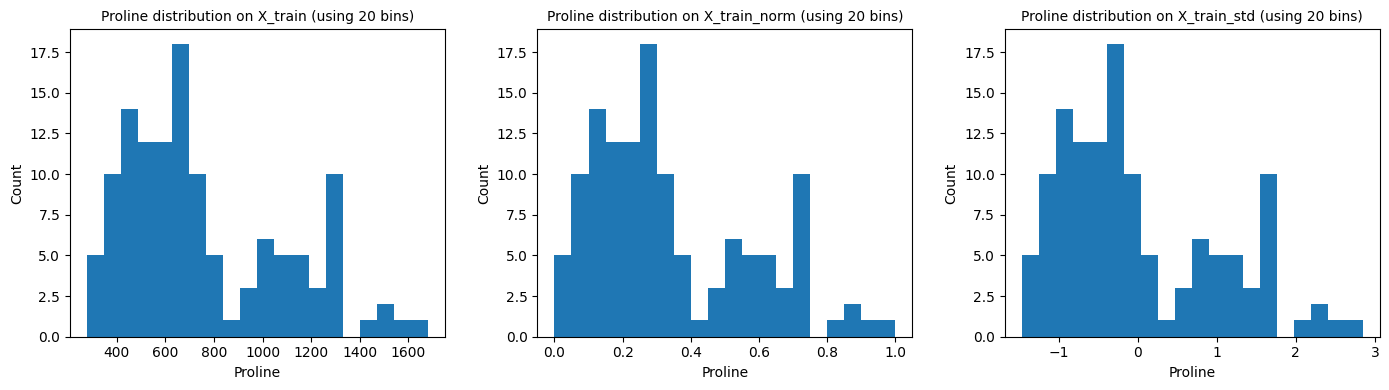

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

for ax in [ax1, ax2, ax3]:
  ax.set_xlabel("Proline")
  ax.set_ylabel("Count")

ax1.set_title("Proline distribution on X_train (using 20 bins)", fontsize=10)
ax1.hist(X_train_pl, bins=20)

ax2.set_title("Proline distribution on X_train_norm (using 20 bins)", fontsize=10)
ax2.hist(X_train_norm_pl, bins=20)

ax3.set_title("Proline distribution on X_train_std (using 20 bins)", fontsize=10)
ax3.hist(X_train_std_pl, bins=20)

fig.tight_layout()
plt.show()